In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
from scipy import stats
import statsmodels.api as sm
import sklearn
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [4]:
#Importing Dataset
wbcd = pd.read_csv('wbcd.csv')

In [5]:
wbcd = pd.DataFrame(wbcd)

In [6]:
#Getting dimensions and structure of the dataframe
wbcd.shape

(569, 32)

In [7]:
wbcd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

In [8]:
#Dropping id
wbcd = wbcd.drop(['id'], axis = 1)
print(wbcd.shape)

(569, 31)


In [9]:
# Target variable
wbcd['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

<function matplotlib.pyplot.show(*args, **kw)>

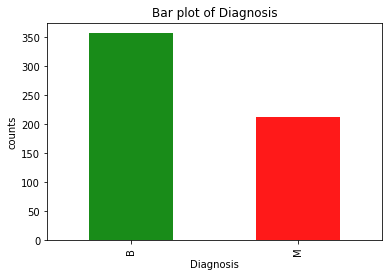

In [10]:
#----- below in one block

wbcd['diagnosis'].value_counts().plot.bar(color = ('g', 'r'), alpha = 0.9)
plt.title('Bar plot of Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('counts')
plt.show

In [11]:
# Train and Test Data

# splitting Data

X = np.array(wbcd.iloc[:, 1:]) # removing diagnosis
y = np.array(wbcd['diagnosis'])

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [13]:
len(X_train)

381

In [14]:
len(X_test)

188

In [15]:
len(y_train)

381

In [16]:
len(y_test)

188

In [58]:
#_____ Build KNN

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 7)
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [59]:
mod = knn.fit(X_train, y_train)
mod

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [60]:
#------- apply on test data

predictions = mod.predict(X_test)
predictions

array(['B', 'M', 'M', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'B', 'M', 'B',
       'B', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'B',
       'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'M',
       'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M',
       'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'B',
       'B', 'M', 'M', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'M',
       'B', 'B', 'M', 'B', 'M', 'M', 'M', 'M', 'M', 'M', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'M', 'B', 'M', 'M',
       'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'B',
       'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'B', 'M',
       'M', 'M', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'B', 'M', 'B',
       'B', 'M', 'B', 'M', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'M',
       'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B',
       'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B

In [61]:
# Check Accuracy 

# ------- Classifiction matrix

pd.crosstab(y_test, predictions, margins = True)

col_0,B,M,All
row_0,,,
B,119,2,121
M,3,64,67
All,122,66,188


In [62]:
(119+62)/(119+62+5+2) #0.9627

0.9627659574468085

In [63]:
#Prediction score 
mod.score(X_test, y_test) #0.9627

0.973404255319149

In [64]:
# Accuracy and matrix 

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, predictions))  #0.9627

0.973404255319149


In [65]:
# Classifiction Accuracy 

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           B       0.98      0.98      0.98       121
           M       0.97      0.96      0.96        67

    accuracy                           0.97       188
   macro avg       0.97      0.97      0.97       188
weighted avg       0.97      0.97      0.97       188



Happy Learning!